# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


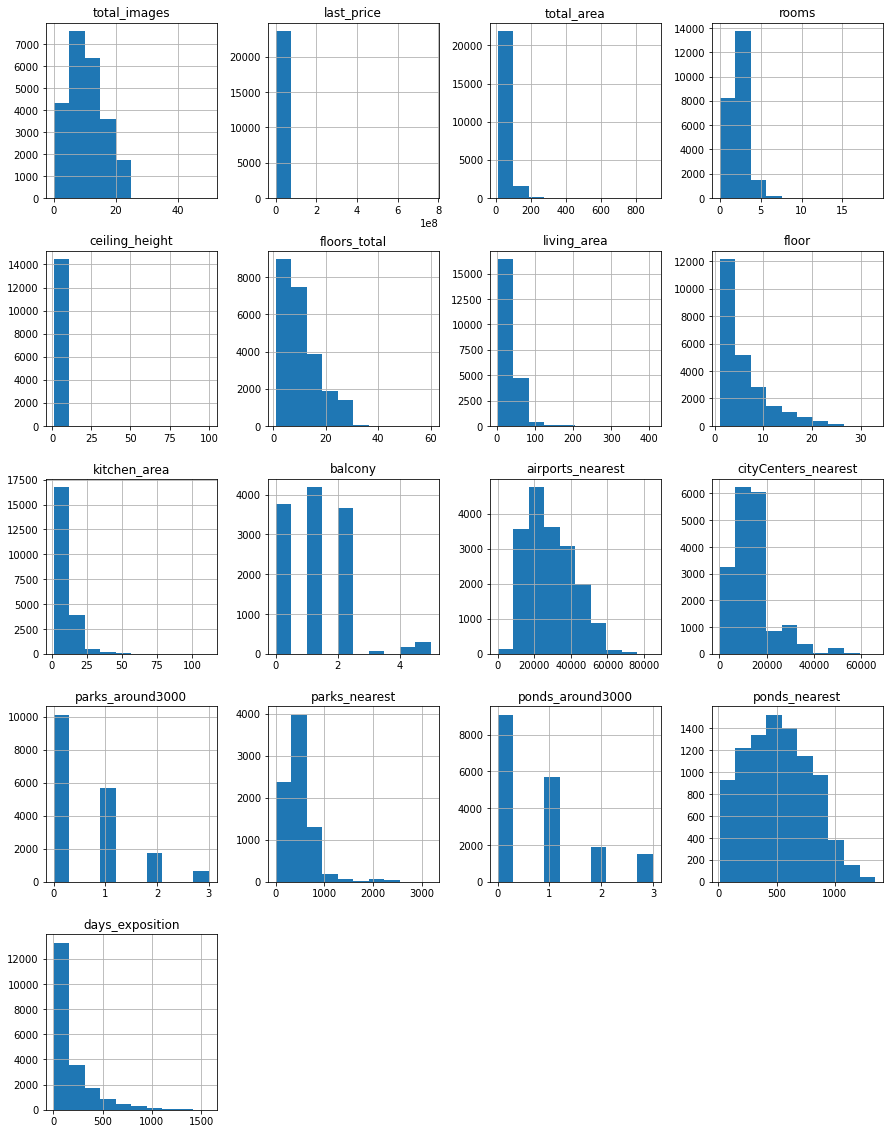

In [3]:
data.hist(figsize=(15, 20));


### Предобработка данных

#### Обработка пропусков

In [4]:
#найдем столбцы с пропусками 
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Заполним пропуски в стоблце, указывающем количество бвлконов, нулями, поскольку пропуски в этих данных свидетельствуют об отсутствии балконов.
Сразу же проверим удалились ли пропуски

In [6]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


То же самое можно сказать про parks_around3000, ponds_around3000, тк парков и прудов может не оказаться в радиусе 3000 метров

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


Просто удалим обьявления, в которых не указан населенный пункт, тк это очень важная информация, скорее всего она не указана по ошибке.
Обьявлений с пропущенным locality_name всего лишь 49, это немного, поэто датасет не сильно пострадает.

In [8]:
data = data.dropna(subset=['locality_name'])

Чаще всего квартира продается хотя бы несколько дней, поэтому снять квартиру с продажи в день создания обьявления о продаже -- это что-то не очень реальное.
Поэтому заполним пропущенные значения медианным по населенному пункту, в котором продается квартира.


In [9]:

for name in data['locality_name'].unique():
    data.loc[data['locality_name'] == name, 'days_exposition'] = data.loc[data['locality_name'] == name, 'days_exposition'].fillna(
        data.loc[data['locality_name'] == name, 'days_exposition'].median())

    

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Есть населенные пункты, для которых вообще не указаны days_exposition, поэтому нельзя найти медиану.
Остаются 80 пропусков в days_exposition.
Поэтому просто удалю их.

In [10]:
data=data.dropna(subset=['days_exposition'])

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
#кухни вполне может не быть, если помещение предназначено не для жилья

In [12]:
print(data[data['airports_nearest'].isna()==True]['locality_name'].value_counts().head(10))
#видно, что не указаны значения в основном для населенных пунктов, не являющихся Питером, можно сделать вывод, что аэропорт просто очень далеко
#также по количсетиву пропусков видно, что расстояния до аэропорта и центра города кореллируют
#заполним эти значения максмальным расстоянием 

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64


In [13]:
print(data[data['cityCenters_nearest'].isna()==True]['locality_name'].value_counts().head(10))

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64


In [14]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].max())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].max())

In [15]:
#не получтся такую же логику применить для расстояния до ближайших парков и прудов, тк пропусков очень много и вряд ли парки и пруды настолько далеко находятся
#можно предположить, что это информация не так важна, поэтому ее заполнение было не обязательным
#заполним медианным значением для населенного пункта
for name in data['locality_name'].unique():
    data.loc[data['locality_name'] == name, 'ponds_nearest'] = data.loc[data['locality_name'] == name, 'ponds_nearest'].fillna(
        data.loc[data['locality_name'] == name, 'ponds_nearest'].median())
    
for name in data['locality_name'].unique():
    data.loc[data['locality_name'] == name, 'parks_nearest'] = data.loc[data['locality_name'] == name, 'parks_nearest'].fillna(
        data.loc[data['locality_name'] == name, 'parks_nearest'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Eсли для какого то населенного пункта вообще не указаны расстояния, то заполним их медианными по всем датасету

In [16]:

data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [17]:
data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])

Проуски в столбце is_apartment могут быть намеренными, тк возможно собственник готов договориться с покупателем о статусе жилья (квартира/апартаменты). 
Апартменты могут быть перведены в статус жилого помещения собственником при отсутствии долгов,поэтому этот вопрос мог быть намеренно оставлен открытым для удобства приобретающего квартиру. 
Поэтому если мы заполним пропуски при помощи False - это не будет ошибкой, тк это не принципиальный вопрос.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Разберемся с высотой потолков

In [19]:
print(data['ceiling_height'].value_counts())

2.50     3502
2.60     1643
2.70     1563
3.00     1109
2.80      992
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


В основном потолки не очень сильно отличаются по высоте и находятся в диапазоне 2.5-3.0 метра.
Аномальные значения мы обработаем чуть позже, а пока заполним пропуски просто медианным значением.

In [21]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name']==locality_name), 'ceiling_height'] = median
    
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Количество этажей в доме можем просто заполнить значениями из столбца floor, тк там нет пропусков

In [22]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [23]:
print(data.isna().sum())

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


**Вывод по заполнению пропусков:**

Пропуски в количестве балконов и количестве прудов и парков в радиусе 3 км от квартиры скорее всего не случайны, а имеют определенную смысловую нагрузку, поэтому мы заполнили их нулями.

Пустые строки в столбце с названием населенного пункта настораживают, потому что это очень важная информация, однако пропусков оказалось очень мало, поэтому мы вовсе избавились от этих обьявлений. Без населенного пункта они нам не так ценны для исследования. Пропуски в данных скорее всегшо возникли из-за технических неполадок.

Пропуски в количестве дней, которое квартира находилась в продаже, мы заполнили медианой по таким же обьявениям в определенном населенным пунктом, тк можно предположить, что квартиры в Санкт-Петербурге покупают охотнее и быстрее, чем в окрестностях. Пропуски могут быть связаны с человеческим фактором, например, человек забыл занести дату продажи квартиры, ли с данные могли потеряться в процессе переформатирования документа и тд...

Кухни в апартаментах может и не быть, поэтому пропуски в этом столбце заполнены нулями.

Пустые строчки в столбцах с расстоянием до аэропорта и до центра города скорее всего связаны с тем, что расстояние очень велико, поэтому мы заполили их максимальным значением.

Расстояние до ближайших парков и прудов скорее всего не указано, тк это не является очень важной информацией, и заполнение этого поля могло быть не обязательным для продающего квартиру. Тк количество прудов и парков разное в разных населенных пунктах, то заполним их медианой по населенным пунктам.

Проуски в столбце is_apartment могут быть намеренными, тк возможно собственник готов договориться с покупателем о статусе жилья (квартира/апартаменты). Апартменты могут быть перведены в статус жилого помещения собственником при отсутствии долгов,поэтому этот вопрос мог быть намеренно оставлен открытым для удобства приобретающего квартиру. Поэтому если мы заполним пропуски при помощи False - это не будет ошибкой, тк это не принципиальный вопрос

Количество этажей в доме можем просто заполнить значениями из столбца floor, тк там нет пропусков

Высота потолков не являются сильно врьирующейся величиной, поэтому зполним медианой






#### Типы данных

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23570 non-null  int64  
 1   last_price            23570 non-null  float64
 2   total_area            23570 non-null  float64
 3   first_day_exposition  23570 non-null  object 
 4   rooms                 23570 non-null  int64  
 5   ceiling_height        23570 non-null  float64
 6   floors_total          23570 non-null  float64
 7   living_area           23570 non-null  float64
 8   floor                 23570 non-null  int64  
 9   is_apartment          23570 non-null  object 
 10  studio                23570 non-null  bool   
 11  open_plan             23570 non-null  bool   
 12  kitchen_area          23570 non-null  float64
 13  balcony               23570 non-null  float64
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

In [25]:
data_int=['days_exposition', 'ponds_around3000', 'parks_around3000', 'airports_nearest', 'balcony', 'floors_total', 'last_price']
for elem in data_int:
    data[elem] = data[elem].astype('int')

In [26]:
print(data['first_day_exposition'].head(20))

0     2019-03-07T00:00:00
1     2018-12-04T00:00:00
2     2015-08-20T00:00:00
3     2015-07-24T00:00:00
4     2018-06-19T00:00:00
5     2018-09-10T00:00:00
6     2017-11-02T00:00:00
7     2019-04-18T00:00:00
8     2018-05-23T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
11    2018-08-27T00:00:00
12    2016-06-30T00:00:00
13    2017-07-01T00:00:00
14    2016-06-23T00:00:00
15    2017-11-18T00:00:00
16    2017-11-23T00:00:00
17    2016-09-09T00:00:00
18    2017-01-27T00:00:00
19    2019-01-09T00:00:00
Name: first_day_exposition, dtype: object


In [27]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [28]:
data['is_apartment']= data['is_apartment'].astype('bool')

In [29]:
data['airports_nearest'] = data['airports_nearest'].astype('float')

**Вывод по изменению типов двнных:**

Необходимо заменить значения в столбцах, в которых указано расстояние или цена на float,тк это могут быть не целые числа, а там где указаны количсетво, наоборот, нужно заменить на int.

is_apartment содержит булевый тип данных, а first_day_exposition указывает на день и врремя, когда было размещено обьявление, поэтому нужно эти данные перевести в соответствующий вид.

Данные должны находиться в соответсвующем для них типе данных, чтобы корректо выполнялись примененные к ним функции.



#### Дубликаты

Найдем явные дубликаты

In [30]:
data.duplicated().sum()

0

Отлично, явных дубликатов нет, перейдем к поиску неявных. Строковые значения содержатся только в стобце с названиями населенных пунктов, поэтому неоднозначность могла возникнуть только там.

In [31]:
print(data['locality_name'].value_counts())

Санкт-Петербург        15721
посёлок Мурино           522
посёлок Шушары           440
Всеволожск               398
Пушкин                   369
                       ...  
деревня Терпилицы          1
деревня Лаврики            1
поселок Володарское        1
посёлок Ропша              1
село Шум                   1
Name: locality_name, Length: 330, dtype: int64


In [32]:
data['locality_name'] = data['locality_name'].str.lower()

In [33]:
print(data['locality_name'].sort_values().unique())

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'городской поселок большая ижора' 'городской поселок янино-1'
 'городской посёлок будогощь' 'городской посёлок виллози'
 'городской посёлок мга' 'городской посёлок назия'
 'городской посёлок новоселье' 'городской посёлок павлово'
 'городской посёлок рощино' 'городской посёлок свирьстрой'
 'городской посёлок фёдоровское' 'городской посёлок янино-1'
 'деревня агалатово' 'деревня аро' 'деревня батово' 'деревня бегуницы'
 'деревня белогорка' 'деревня большая вруда' 'деревня большая пустомержа'
 'деревня большие колпаны' 'деревня большое рейзино' 'деревня бор'
 'деревня борисова грива' 'деревня ваганово' 'деревня вартемяги'
 'деревня вахнова кара' 'деревня выскатка' 'деревня гарболово'
 'деревня глинка' 'деревня горбунки' 'деревня гостилицы'
 'деревня заклинье' 'деревня заневка' 'деревня зимитицы' 'деревня извара'
 'деревня иссад' 'деревня калитино' 'деревня кальтино' 'деревня камышовка'
 'деревня каськово' 'дерев

In [39]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [40]:
 print(data['locality_name'].value_counts())

санкт-петербург           15721
поселок мурино              556
поселок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок ропша                 1
поселок пикколово             1
поселок борисова грива        1
поселок кисельня              1
поселок алексеевка            1
Name: locality_name, Length: 284, dtype: int64


lenght теперь 284, а значит мы убрали примерно 50 дубликатов

#### Обработка аномалий

In [41]:
print(data['ceiling_height'].unique())

[  2.7     2.63    3.03    2.6     2.64    2.5     2.67    2.55    2.56
   3.05    2.75    2.9     2.56    2.8     3.      2.65    3.2     2.61
   3.25    3.45    2.77    2.85    2.525   2.57    4.15    3.5     3.3
   2.71    4.      2.47    2.73    2.84    3.1     2.34    3.4     2.52
   3.06    2.72    2.54    2.51    2.78   13.85    2.76   25.      2.58
   3.7     5.2     2.87    2.66    2.59    2.      2.45    3.6     3.9
   2.92    3.11    3.13    3.8     3.15    3.55    3.16    3.62    3.12
   2.53    2.74    2.96    2.46    5.3     5.      2.79    2.95    4.06
   2.94    3.82    3.54    3.53    2.83    4.7     2.4     3.38    3.01
   5.6     3.65    3.18    3.35    2.3     3.57    2.48    2.515   2.62
   2.82    2.65    3.98    3.83   27.      3.52    3.95    3.75    2.88
   3.67    3.87    3.66    3.85    3.86    4.19    3.24    4.8     4.5
   4.2     3.36   32.      3.08    3.68    3.07    3.37    3.09    8.
   3.26    3.34    2.81    3.44    2.97    3.14    2.725   4.37    2.

In [42]:
print(data.loc[data.loc[:,'ceiling_height'] > 10]['ceiling_height']) 

313       13.85
355       25.00
2158      27.00
3148      32.00
4643      25.00
4876      27.00
5076      24.00
5246      27.00
5669      26.00
5807      27.00
6246      25.00
9379      25.00
10067     13.85
10069     13.85
10773     27.00
11285     25.00
14382     25.00
15061     14.00
17496     20.00
17857     27.00
18545     25.00
20478     27.00
20507     22.60
21377     27.50
21824     27.00
22309     10.30
22336     32.00
22869    100.00
22938     27.00
Name: ceiling_height, dtype: float64


In [43]:
for name in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'] >10, 'ceiling_height'] = data.loc[data['ceiling_height'] >10, 'ceiling_height']/10
        

In [45]:
print(data['ceiling_height'].unique())

[ 2.7    2.63   3.03   2.6    2.64   2.5    2.67   2.55   2.56   3.05
  2.75   2.9    2.56   2.8    3.     2.65   3.2    2.61   3.25   3.45
  2.77   2.85   2.525  2.57   4.15   3.5    3.3    2.71   4.     2.47
  2.73   2.84   3.1    2.34   3.4    2.52   3.06   2.72   2.54   2.51
  2.78   1.385  2.76   2.58   3.7    5.2    2.87   2.66   2.59   2.
  2.45   3.6    3.9    2.92   3.11   3.13   3.8    3.15   3.55   3.16
  3.62   3.12   2.53   2.74   2.96   2.46   5.3    5.     2.79   2.95
  4.06   2.94   3.82   3.54   3.53   2.83   4.7    2.4    3.38   3.01
  5.6    3.65   3.18   3.35   2.3    3.57   2.48   2.515  2.62   2.82
  2.65   3.98   3.83   3.52   3.95   3.75   2.88   3.67   3.87   3.66
  3.85   3.86   4.19   3.24   4.8    4.5    4.2    3.36   3.08   3.68
  3.07   3.37   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14
  2.725  4.37   2.68   2.6    3.22   3.27   2.675  4.1    2.93   3.46
  3.47   3.33   3.63   2.625  3.32   2.615  1.2    8.3    2.98   2.86
  3.17   4.4    3.28  

In [46]:
print(data['ceiling_height'])

0        2.70
1        2.63
2        2.70
3        2.70
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.70
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23570, dtype: float64


In [47]:
data.loc[data.loc[:,'ceiling_height'] == 10,'ceiling_height'] = np.nan
data.loc[data.loc[:,'ceiling_height'] == 1.03,'ceiling_height'] = np.nan

In [48]:
data=data.dropna(subset=['ceiling_height'])


In [49]:
print(data['ceiling_height'].unique())

[2.7   2.63  3.03  2.6   2.64  2.5   2.67  2.55  2.56  3.05  2.75  2.9
 2.56  2.8   3.    2.65  3.2   2.61  3.25  3.45  2.77  2.85  2.525 2.57
 4.15  3.5   3.3   2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   2.52
 3.06  2.72  2.54  2.51  2.78  1.385 2.76  2.58  3.7   5.2   2.87  2.66
 2.59  2.    2.45  3.6   3.9   2.92  3.11  3.13  3.8   3.15  3.55  3.16
 3.62  3.12  2.53  2.74  2.96  2.46  5.3   5.    2.79  2.95  4.06  2.94
 3.82  3.54  3.53  2.83  4.7   2.4   3.38  3.01  5.6   3.65  3.18  3.35
 2.3   3.57  2.48  2.515 2.62  2.82  2.65  3.98  3.83  3.52  3.95  3.75
 2.88  3.67  3.87  3.66  3.85  3.86  4.19  3.24  4.8   4.5   4.2   3.36
 3.08  3.68  3.07  3.37  3.09  8.    3.26  3.34  2.81  3.44  2.97  3.14
 2.725 4.37  2.68  2.6   3.22  3.27  2.675 4.1   2.93  3.46  3.47  3.33
 3.63  2.625 3.32  2.615 1.2   8.3   2.98  2.86  3.17  4.4   3.28  3.04
 4.45  5.5   3.84  3.23  3.02  3.21  3.43  2.575 2.555 3.78  4.3   3.39
 2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49  1.4 

Остальные значения вполне приемлемы, тк потолки могут находить на высота до 5-6 метров.

А теперь рассмотрим другие столбцы

In [50]:
print(data['balcony'].unique())

[0 2 1 5 4 3]


In [51]:
print(data['floors_total'].unique())
#дома бывают и 60-ти этажные, поэтому идем дальше

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
  1 20 28 36 21 35 34 60 29 33 52 37]


In [52]:
print(data['floor'].unique())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


In [53]:
print(data['last_price'].sort_values())

8793         12190
17456       430000
14911       430000
16274       440000
17676       450000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23568, dtype: int64


(0.0, 50000000.0)

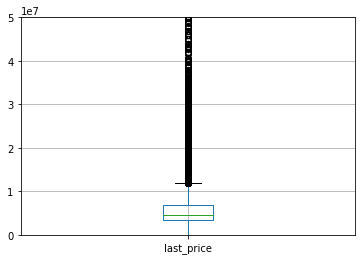

In [54]:
data_price = data[['last_price']]. copy ()
data_price.boxplot()
plt.ylim(0,50000000)

Достаточно странно, что квартира стоит 12190

In [55]:
print(data.query('last_price == 12190'))


      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793            2.75            25         32.0     25          True  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
8793          40.5        0  санкт-петербург           36421.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793              9176.0                 1          805.0                 0   

      ponds_nearest  days_exposition  
8793          503.0                8  

[1 rows x 22 columns]


Cтоит домножить это значение,тк квартира не может стоить 12 тыс рублей, произошла ошибка при внесении данных

In [56]:
for elem in data['last_price'].unique():
    data.loc[data['last_price'] == 12190, 'last_price'] = data.loc[data['last_price'] == 12190, 'last_price']*1000


Квартиры за несколько сотен тысяч имеют маленькую площадь и находятся в деревнях и поселках, поэтому цена скорее всего правильная 

In [57]:
print(data['rooms'].unique()) 


[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


0 комнат, если это студия, но если компнат больше 10, то это подозрительно

In [58]:
for elem in data['rooms'].unique():
    data.loc[data['rooms'] >10, 'rooms'] = data.loc[data['rooms'] >10, 'rooms']-10
#возможно, единичка в начале числа была написана случано;)


In [59]:
print(data['total_area'].max())
print(data[data['total_area'] == 900.0])
#данные похожи на правду

900.0
       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
19540             2.8            25        409.7     25          True  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
19540         112.0        0  санкт-петербург           30706.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
19540              7877.0                 0          460.0                 2   

       ponds_nearest  days_exposition  
19540          318.0              106  

[1 rows x 22 columns]


Все остальные значения не вызывают подозрений

### Посчитаем и добавим в таблицу новые столбцы

In [60]:
#столбец с ценой за квадратный метр
data['price_per_meter'] = round(data['last_price']/data['total_area'])
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.63            11         18.6      1          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14        159.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  санкт-петербург           18863.0             

In [61]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.63            11         18.6      1          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14        159.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

     locality_name  airports_nearest  cityCenters_nearest  parks_around3000  \
0  санкт-петербург           18863.0             

In [62]:
#месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.63            11         18.6      1          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14        159.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0           

In [63]:
#год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.63            11         18.6      1          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14        159.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0                 1          4

In [65]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def definer_of_floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
    

In [66]:
data['floor_type'] = data.apply(definer_of_floors, axis=1)
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   
5            10     2890000       30.40           2018-09-10      1   
6             6     3700000       37.30           2017-11-02      1   
7             5     7915000       71.60           2019-04-18      2   
8            20     2900000       33.16           2018-05-23      1   
9            18     5400000       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16        51.00      8          True  ...   
1            2.63            11        18.60      1          True  ...

In [67]:
#расстояние до центра города в километрах
data['city_center_km'] = round(data['cityCenters_nearest']/1000)
print(data['city_center_km'].head(5))
print(data['cityCenters_nearest'].head(5))

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_center_km, dtype: float64
0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64


### Проведем исследовательский анализ данных

#### Анализ гистограмм

In [70]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter',
       'day_of_the_week', 'month', 'year', 'floor_type', 'city_center_km'],
      dtype='object')

In [71]:
columns_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_the_week', 'month']

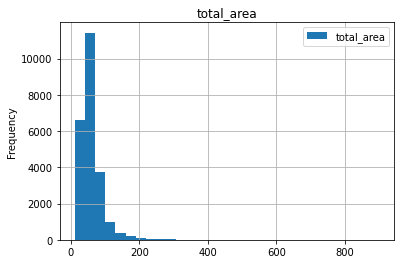

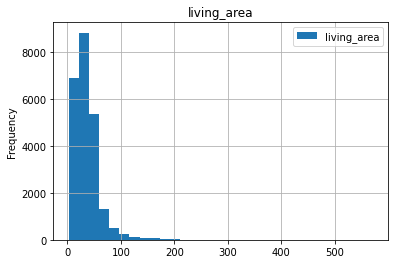

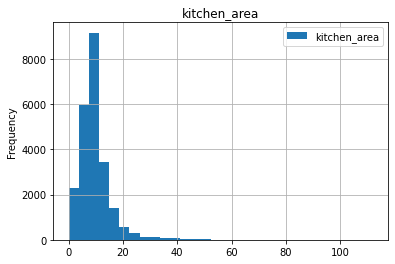

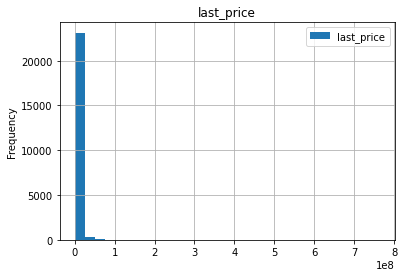

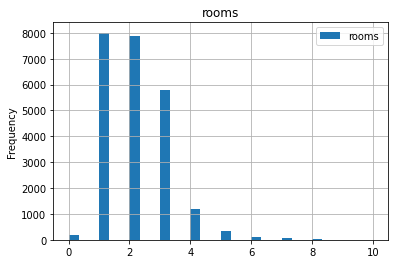

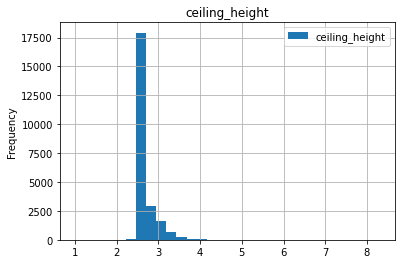

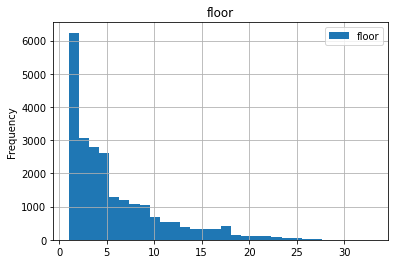

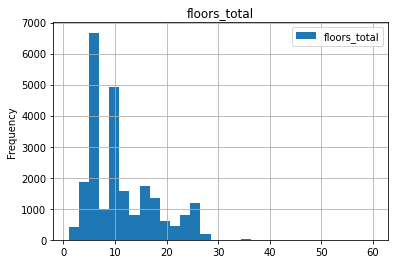

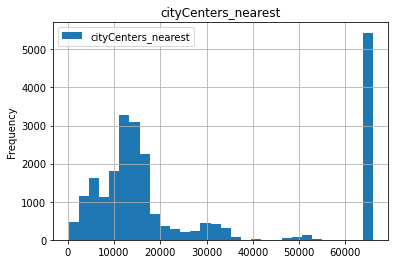

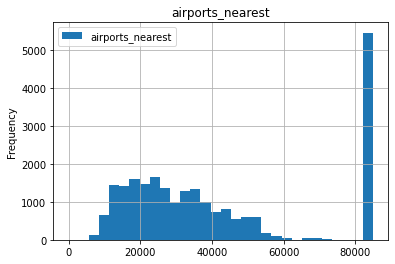

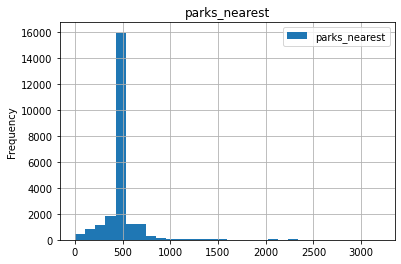

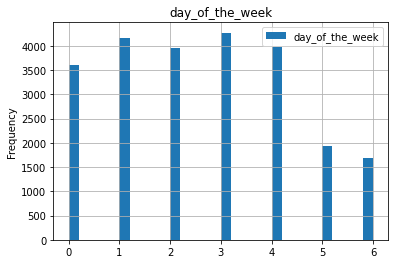

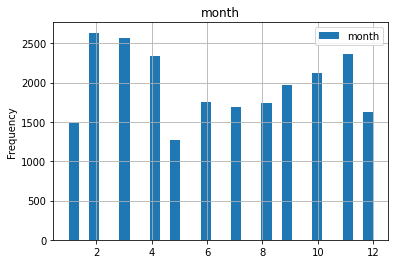

In [72]:
for elem in columns_list:
    data.plot(kind='hist', title = elem, y = elem, grid =True, bins=30)

<AxesSubplot:>

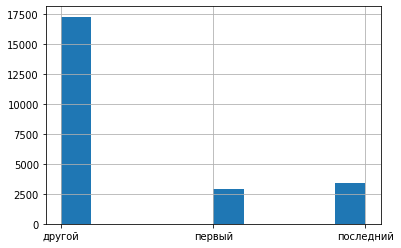

In [73]:
data['floor_type'].hist()

<AxesSubplot:>

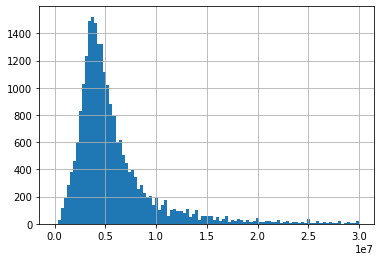

In [74]:
data['last_price'].hist(bins=100, range=(0,30000000))
#для этих данных построим отдельный график, чтобы скорректироовать масштаб

<AxesSubplot:>

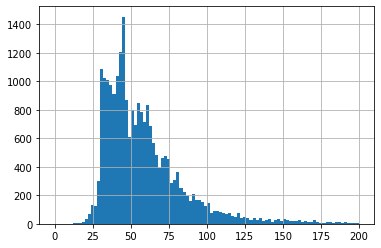

In [75]:
data['total_area'].hist(bins=100, range=(0,200))

<AxesSubplot:>

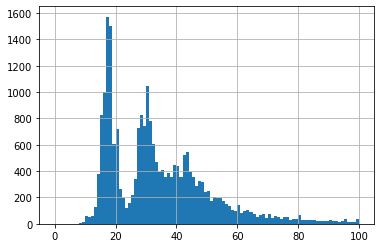

In [76]:
data['living_area'].hist(bins=100, range=(0,100) )

<AxesSubplot:>

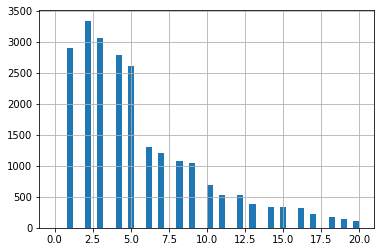

In [77]:
data['floor'].hist(bins=50, range=(0,20) )

**Вывод по гистограммам:**

1) Самая часто стречающаяся общая площадь квартир -- 45-50 квадратных метров. Большинсвто кввратир имеют площадь до 50, после 50 квадратных метров вероятность встретить такие обьявления плавно снижается.

2) Очень часто жилая площадь равна примерно 18 квадратным метрам, также достаточно популярным вариантом явдяется 30 квадратных метров. Площадь, превышающая 100 кв м, почти не встречается

3) Площадь кухни чаще всего равна 15 квадратным метрам.

4) Цена большинства квартир не превышает 5 млн рублей. Количество квартир с ценником, равным чуть больше и чуть мнньше этого значения, также очень много, график плавно возрастает , достигает пика и плавно спадает. Нет резких скачков

5) Больше всего однокомнатных и двухкомнатных квартир. Также популярностью пользуются трехкомнатные квартиры, остальных квартир достаточно мало.

6) Потолок имеет высоту 2.5-2.75 м в большинстве квартир. Значения меньше этого почти не встречаются.

7) Большая часть квартир находится на 2 и 3 этажах, при увеличении номера этажа постепенно снижается количсетво обьявлений

8) Чаще всего дом жилой не имеет более 10 этажей. одним из самых популярных варинтов является 5этажный дом и 10этажный. Очень много 5этажек, потому что это скорее всего хрущевки, а 10этажные дома выюирают строить современные застройщики.

9) В диапазоне от 10 км до 20 км от центра города находятся огромное количство квартир. Также множество из них находятся на предельном большом расстоянии от центра. Это говори о том, что продающихся квартир в окрестностях так же много как и в Санкт-Петербурге.

10) Парки же, в свою очередь, находятся относительно близко. Более половины квартир находят от парка на расстоянии 400-500 м. 

11) Квартиры реже всего размещают на платформе проаджи квартиры в выходные дни. В будние почти одиаково часто.

12) Что касается месяца, то у людей чаще всего возникает желание продать свою квартиру в начале года и под конец. 

13) Также, очвеидно, что первый и последний этаж не так часто встречаются в обьявлениях, как другие этажи



#### Анализ days_exosition

<AxesSubplot:>

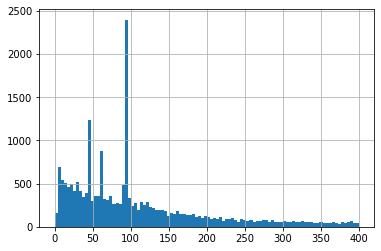

In [78]:
data['days_exposition'].hist(bins=100, range=(0,400))

In [79]:
print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())
# можно заметить, что медианное значение гораздо точнее отражает поплярность значений days_exposition

Среднее значение: 170.19738628649014
Медианное значение: 95.0


In [80]:
print(data['days_exposition'].describe())

count    23568.000000
mean       170.197386
std        207.241689
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [81]:
Min_verge = 45*1.5
Max_verge = 201*1.5
print(45 - Min_verge,201+Max_verge)

-22.5 502.5


Обьявление о продаже квартиры чаще всего висит на платформе около 95 дней, также часто держится там около 45 и 60 дней.
Если квартира не продается более 502 дней, можно считать, что она продается необычно долго. 

#### Факторы, влияющие на стоимость квартиры

In [82]:
#зависимость от общей площади
table_area = data.pivot_table(index='total_area', values ='last_price', aggfunc= 'median')
print(table_area)

             last_price
total_area             
12.0          2400000.0
13.0          1850000.0
13.2          1686000.0
14.0          1190000.0
15.0          1725000.0
...                 ...
590.0        65000000.0
618.0       300000000.0
631.0       140000000.0
631.2       140000000.0
900.0       420000000.0

[2177 rows x 1 columns]


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

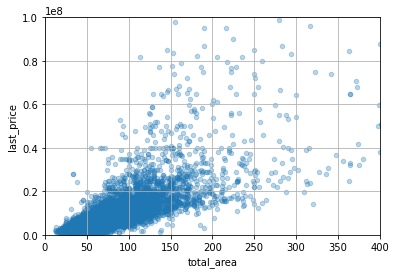

In [83]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0,400), ylim=(0,100000000), grid=True)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

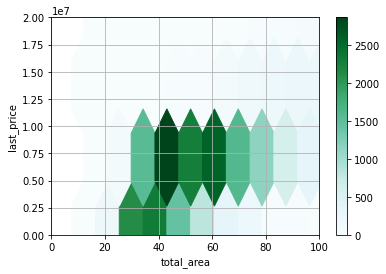

In [84]:
data.plot(x='total_area', y='last_price', kind='hexbin', sharex=False, xlim=(0,100), ylim=(0,20000000), grid=True)

In [85]:
print(data['total_area'].corr(data['last_price']))


0.6539249032537694


Cуществует прямая зависимость между этими двумя величинами, чем больше площадь, тем больше стоимость

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

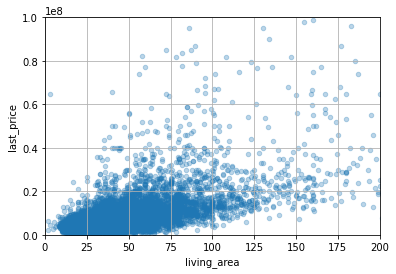

In [86]:
#зависимость от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0,200), ylim=(0,100000000), grid=True)

In [87]:
print(data['living_area'].corr(data['last_price']))
#зависимость также есть, она прямая, однако не такая сильная, как для общей площади

0.5598834233147062


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

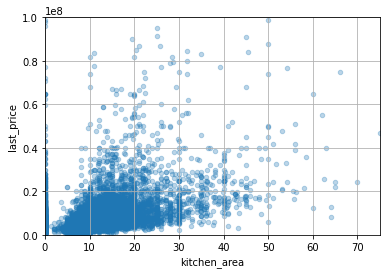

In [88]:
#Влияние площади кухни 
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0,75), ylim=(0,100000000), grid=True)

In [89]:
print(data['kitchen_area'].corr(data['last_price']))
#корелляции почти нет

0.3869805410780481


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

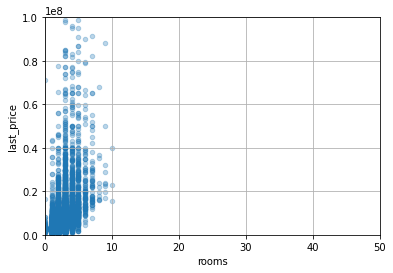

In [90]:
#зависимость от количества комнат
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, xlim=(0,50), ylim=(0,100000000), grid=True)

In [91]:
print(data['rooms'].corr(data['last_price']))
#корелляция очень слабая

0.3494363463347354


<AxesSubplot:xlabel='floor_type'>

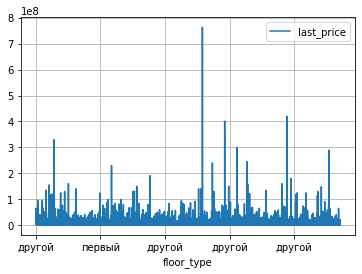

In [92]:
#этажа, на котором расположена квартира (первый, последний, другой)
data.plot(x='floor_type', y='last_price', grid=True)

            last_price
floor_type            
другой         4850000
первый         3900000
последний      4350000


<AxesSubplot:xlabel='floor_type'>

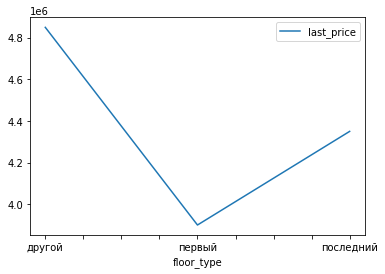

In [93]:
data_floor=data.pivot_table(index='floor_type', values = 'last_price', aggfunc='median')
print(data_floor)
data_floor.plot()

Очевидно, что тип этажа влияет на стоимость. Так, стоимость квартиры на первом этаже гораздо ниже стоимости квартир на других этажах. 
Спрос на первый этаж невелик.

                 last_price
day_of_the_week            
0                   4650000
1                   4750000
2                   4700000
3                   4650000
4                   4590000
5                   4600000
6                   4550000


<AxesSubplot:xlabel='day_of_the_week'>

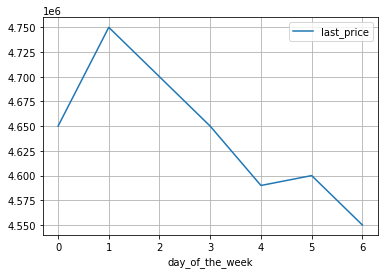

In [95]:
#влияние дня недели, месяца и года
data_day=data.pivot_table(index='day_of_the_week', values = 'last_price', aggfunc='median')
print(data_day)
data_day.plot(grid=True)

Как показывают данные, обьявления размещенные во вторник, имеют наибольший средний ценник. 
Далее двигаясь по дням недели, стоимость падфет, затем немного возрастает в субботу, в вск размещены самые дешевые обьявления

       last_price
month            
1         4600000
2         4650000
3         4700000
4         4800000
5         4530000
6         4400000
7         4650000
8         4595000
9         4700000
10        4572500
11        4700000
12        4700000


<AxesSubplot:xlabel='month'>

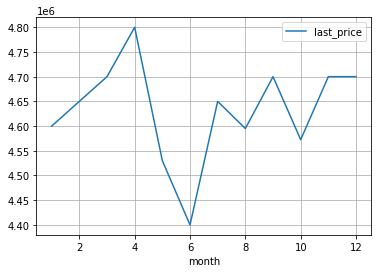

In [97]:
data_m=data.pivot_table(index='month', values = 'last_price', aggfunc='median')
print(data_m)
data_m.plot(grid=True)

Пик стоимости наблюдается в апреле, в начале лета размещаются самые дешевые квартиры


      last_price
year            
2014     7640000
2015     5350000
2016     4550000
2017     4500000
2018     4570000
2019     5100000


<AxesSubplot:xlabel='year'>

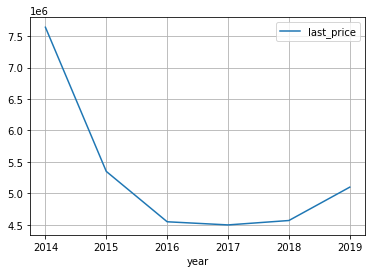

In [99]:
data_year=data.pivot_table(index='year', values = 'last_price', aggfunc='median')
print(data_year)
data_year.plot(grid=True)

В 2014 были самые высокие цены, затем они начали падать, но в 2018 году опять начался рост

      total_area
year            
2014       76.18
2015       60.00
2016       53.02
2017       52.00
2018       50.40
2019       52.00


<AxesSubplot:xlabel='year'>

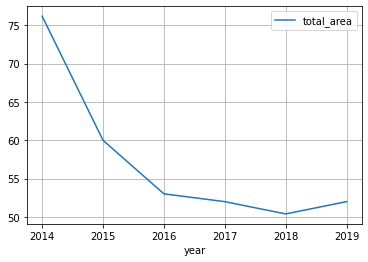

In [101]:
data_year_area=data.pivot_table(index='year', values = 'total_area', aggfunc='median')
print(data_year_area)
data_year_area.plot(grid=True)

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [102]:
#ищем топ 10 по количеству обьявлений
data_local=data.pivot_table(index='locality_name',values='price_per_meter', aggfunc=['median', 'count'])
data_local.columns=['median_price', 'amount_of_publications']
top = data_local.sort_values(by='amount_of_publications', ascending=False).head(10)
print(top)

                   median_price  amount_of_publications
locality_name                                          
санкт-петербург        104762.0                   15719
поселок мурино          85878.5                     556
поселок шушары          76876.0                     440
всеволожск              65789.0                     398
пушкин                 100000.0                     369
колпино                 74723.5                     338
поселок парголово       91643.0                     327
гатчина                 67797.0                     307
поселок кудрово         91860.0                     299
выборг                  58158.0                     237


In [103]:
data_local[data_local['median_price'] ==data_local['median_price'].max()]


,median_price,amount_of_publications
locality_name,,
санкт-петербург,104762.0,15719


In [104]:
data_local[data_local['median_price'] ==data_local['median_price'].min()]

,median_price,amount_of_publications
locality_name,,
поселок старополье,11000.0,3


Регионом с самой большой стоимостью за квадратный метр является Санкт-Петербург, а самая низкая стоимость в Старополье

#### Как стоимость объектов зависит от расстояния до центра города.


In [105]:
data_saint_peter=data[data['locality_name']=='санкт-петербург']
print(data_saint_peter.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   
7             5     7915000        71.6           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14        159.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   
7            2.70            24         52.7     22          True  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0         

In [106]:
data_price_per_km = data_saint_peter.pivot_table(index='city_center_km', values='last_price', aggfunc='mean')
data_price_per_km=data_price_per_km.reset_index()
print(data_price_per_km)

    city_center_km    last_price
0              0.0  3.144912e+07
1              1.0  2.120672e+07
2              2.0  1.778832e+07
3              3.0  1.112658e+07
4              4.0  1.330428e+07
5              5.0  1.449912e+07
6              6.0  1.533842e+07
7              7.0  1.477515e+07
8              8.0  9.949257e+06
9              9.0  6.971195e+06
10            10.0  6.504119e+06
11            11.0  6.250815e+06
12            12.0  5.828874e+06
13            13.0  6.083141e+06
14            14.0  5.629101e+06
15            15.0  5.884751e+06
16            16.0  5.373131e+06
17            17.0  5.292395e+06
18            18.0  5.091331e+06
19            19.0  5.037675e+06
20            20.0  5.951465e+06
21            21.0  5.493469e+06
22            22.0  5.415524e+06
23            23.0  4.985376e+06
24            24.0  3.854430e+06
25            25.0  4.052840e+06
26            26.0  3.973013e+06
27            27.0  8.300000e+06
28            28.0  5.026429e+06
29        

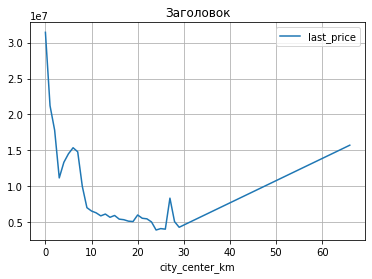

In [110]:
data_price_per_km.plot(y= 'last_price', x='city_center_km', grid = True, title = 'Заголовок')
plt.show()

Самая большая стоимость у квартир в самом центре. При удалении от центра цена падает. 
Минимум находится на отметке 25 км от центра. После 30 км цена потихоньку начинает расти.

### Общий вывод

В ходе работы была проведена подготовка данных к исследованию, заполнены пропуски, удалены дубликаты, данные были приведены к соответствующему для них типу. Далее, были построены гистограммы по каждому из важных параметров и сделаны выводы о популярности каждой из характеристик квартир.  

Самая часто стречающаяся общая площадь квартир -- 45-50 квадратных метров. Большинсвто кввратир имеют площадь до 50, после 50 квадратных метров вероятность встретить такие обьявления плавно снижается.

Очень часто жилая площадь равна примерно 18 квадратным метрам, также достаточно популярным вариантом явдяется 30 квадратных метров. Площадь, превышающая 100 кв м, почти не встречается

Площадь кухни чаще всего равна 15 квадратным метрам.

Цена большинства квартир не превышает 5 млн рублей. Количество квартир с ценником, равным чуть больше и чуть мнньше этого значения, также очень много, график плавно возрастает , достигает пика и плавно спадает. Нет резких скачков

В диапазоне от 10 км до 20 км от центра города находятся огромное количство квартир. Также множество из них находятся на предельном большом расстоянии от центра. Это говори о том, что продающихся квартир в окрестностях так же много как и в Санкт-Петербурге.

Также, было проанализировано количество дней, которое каждая из квартир, находилась в продаже.Высянилось, что если квартира не продается в течение 1.5 лет, то это считается достаточно большим сроком.
 
Были построены график типа scatter для нахождения корелляции между стоимостью квартиры и ее характеристиками. Существует достаточно сильная корелляция между стоимостью квартир и площадью общей, площадью жилой

Также было обнаружено, что регионом с самой большой стоимостью за квадратный метр является Санкт-Петербург, а самая низкая стоимость в Старополье

И очевидно, что при удалении от центра падает цена квартиры, однако, после 30 км цена начинает расти.

